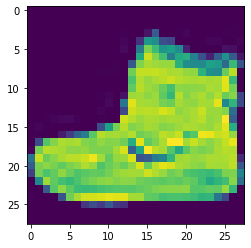

In [3]:
import util
import tensorflow as tf
import matplotlib.pyplot as plt

x_train, y_train = util.load_mnist()
x_test, y_test = util.load_mnist(kind = "t10k")

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1) 

plt.imshow(x_train[0])


In [4]:
from tensorflow.keras import layers
model = tf.keras.Sequential([
    layers.Conv2D(filters=8, kernel_size=5, padding="same", strides=2, activation="relu", input_shape=(28, 28, 1)),
    layers.Conv2D(filters=16, kernel_size=3, padding="same", strides=2, activation="relu", input_shape=(28, 28, 1)),
    layers.Conv2D(filters=32, kernel_size=3, padding="same", strides=2, activation="relu", input_shape=(28, 28, 1)), 
    layers.Conv2D(filters=32, kernel_size=3, padding="same", strides=2, activation="relu", input_shape=(28, 28, 1)),
    layers.AveragePooling2D(1),
    layers.Flatten(),
    layers.Dense(10, activation="relu"),
    layers.Softmax()
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 8)         208       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 16)          1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 32)          9248      
_________________________________________________________________
average_pooling2d (AveragePo (None, 2, 2, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

2021-12-09 22:42:31.456216: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_train, y_train))

2021-12-09 22:50:29.540260: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.9608 - accuracy: 0.6550 - val_loss: 0.7498 - val_accuracy: 0.7234
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5879 - accuracy: 0.8006 - val_loss: 0.5398 - val_accuracy: 0.8143
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4200 - accuracy: 0.8539 - val_loss: 0.3044 - val_accuracy: 0.8902
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3095 - accuracy: 0.8877 - val_loss: 0.2778 - val_accuracy: 0.8977
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2888 - accuracy: 0.8945 - val_loss: 0.2609 - val_accuracy: 0.9050
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2756 - accuracy: 0.8981 - val_loss: 0.2516 - val_accuracy: 0.9064
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2627 - accuracy: 0.9038 - val_loss: 0.2434 - val_ac

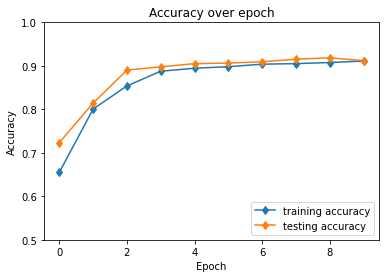

In [10]:
plt.figure()
plt.plot(history.history['accuracy'], "-d", label="training accuracy")
plt.plot(history.history['val_accuracy'], "-d", label="testing accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.title("Accuracy over epoch")
plt.legend(loc='lower right')
plt.show()
plt.close()